# Итерируемые объекты, итераторы и генераторы

В питоне существует некоторое разделение объектов, имееющих отношение к процессу **итерации**. Выделяют **итерируемые объекты (Iterables)**, **итераторы (Iterators)** и **генераторы (Generators)**. Они обладают некоторыми отличительными особенностями и в этой лекции мы разберём как они работают и где их использовать.

Сразу, не вдаваясь глубоко в обсуждение, стоит упомянуть, что **генераторы являются подмножеством итераторов**, а **итераторы являются подмножеством итерируемых объектов** (за небольшим исключением). Данную иерархию можно отобразить при помощь следующей диаграмы, на неё также нанесены примеры подобных объектов

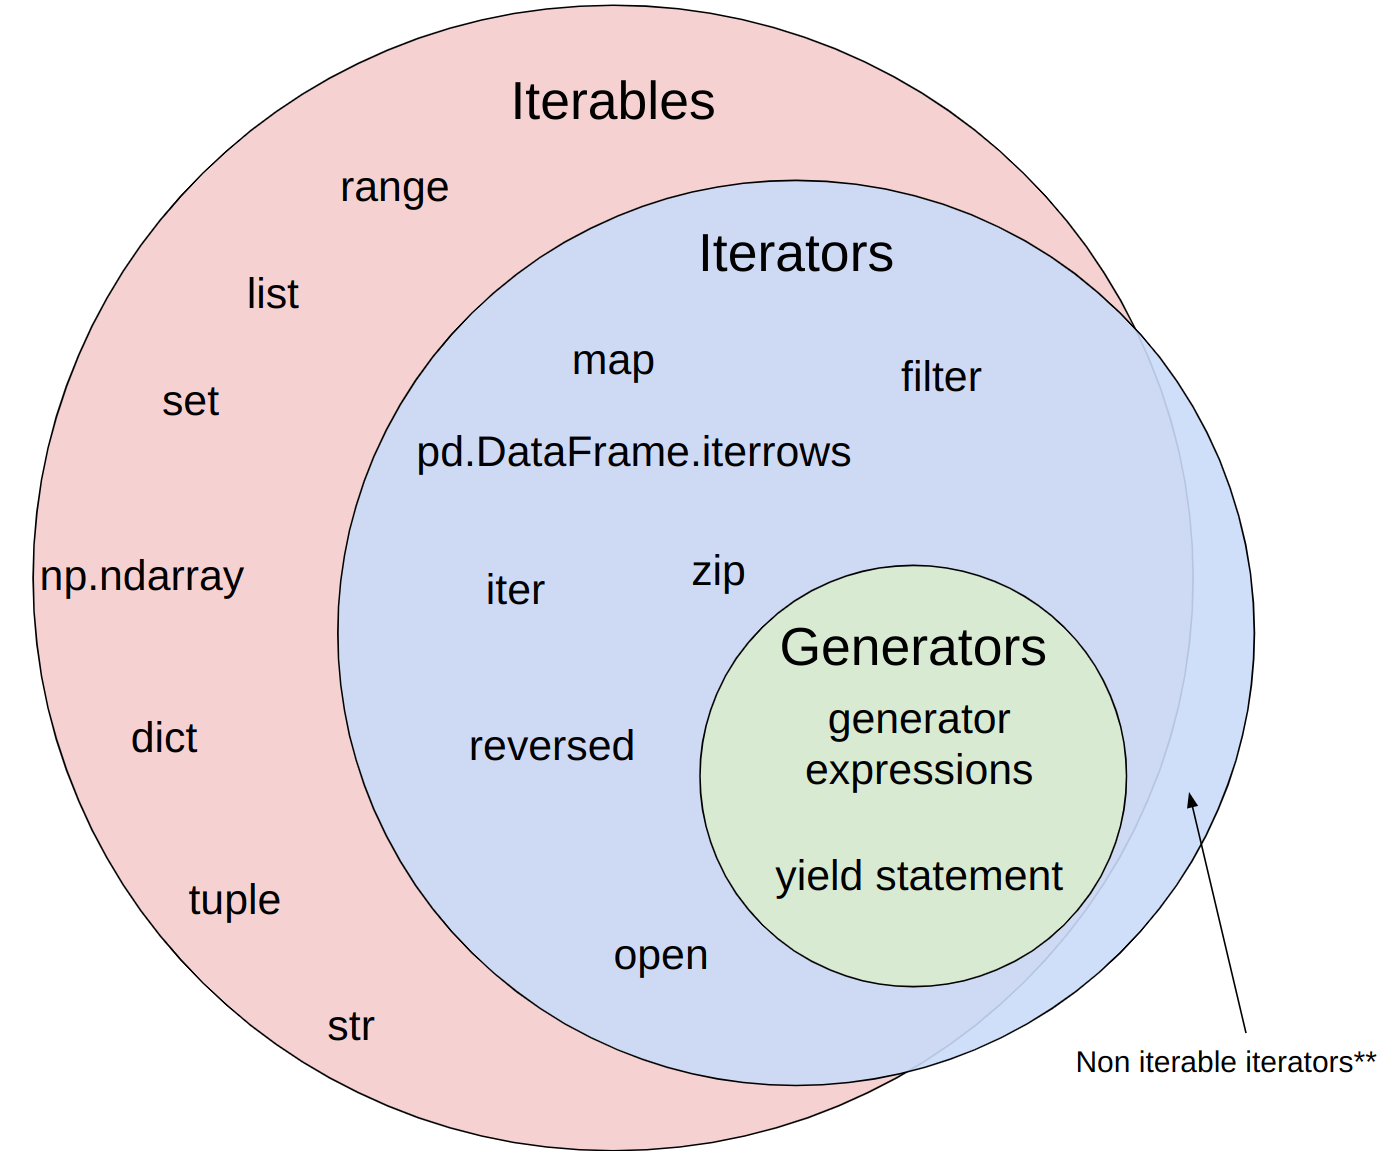

# Итерируемые объекты

Если сильно не умничать и составить простое определение, то **iterables** это те объекты, **которые можно использовать в цикле** `for _ in iterable:` и при этом не выпадет ошибка.

Мы с вами уже знаем много таких объектов и уже привыкли с ними работать. Это встроенных коллекции, numpy array'и и т.д.

# Итераторы

На самом деле мы с вами уже работали с итераторами. Итераторами, например, являются результаты выполнения функций `map` и `filter`

In [40]:
iterator = map(lambda x: x + 1, [0, 1, 2])
iterator

## База

### Определение

**Итератор** &mdash; это объект, который **способен возвращать элементы по одному**. Получать элементы из итератора можно при помощи функции `next`. Иначе говоря, итератор &mdash; это объект, который умеет работать с `next`

In [1]:
iterator = map(lambda x: x + 1, [0, 1, 2])
iterator

In [2]:
next(iterator)

1

In [28]:
next(iterator)

2

In [29]:
next(iterator)

3

In [30]:
next(iterator)

StopIteration: 

Обратите внимание, что когда в итераторе заканчиваются значения (в нашем случае там было всего 3 элемента) и мы пытаемся получить ещё одно при помощи `next`, нам выбрасывается специальное исключение `StopIteration`. Такое исключение обязаны выбрасывать все **конечные** итераторы при исчерпании запаса элементов

Также важной особенностью итераторов является их **одноразовость**, получить все значения из итератора можно всего один раз

Благодаря одноразовости итераторов можно делать прикольные вещи, например, взять из итератора несколько элементов, а потом проитерироваться по нему. В таком случае итерация начнётся с последнего элемента итератора, который мы ещё не забрали

In [104]:
iterator = map(lambda x: x, [0, 1, 2, 3, 4, 5, 6])
first_element = next(iterator)
second_element = next(iterator)
for item in iterator:  # К моменту начала цикла, в итераторе уже нет 2 элементов
    print(item)

2
3
4
5
6


In [106]:
for item in iterator:  # А к этому циклу в нём уже ничего не осталось. Всё разобрал предыдущий цикл
    print(item)

В коде выше и в ДЗ по функциональному программированию мы использовали итераторы в цикле `for`, это значит, что **итераторы являются итерируемыми объектами**

Ещё одно свойство итераторов с которым мы уже знакомы &mdash; **у итераторов нельзя брать элементы по индексу**. Единственное, что они умеют - **отдавать элементы по одному**

In [2]:
iterator = map(lambda x: x, [0, 1, 2, 3, 4, 5, 6])
first_element = iterator[0]   # Ошибка, так делать нельзя

TypeError: 'map' object is not subscriptable

Именно поэтому, когда мы хотим получить из итератора все значения разом, мы обычно превращаем его в список

In [3]:
iterator = map(lambda x: x**2, [0, 1, 2, 3, 4, 5, 6])
list(iterator)

[0, 1, 4, 9, 16, 25, 36]

Внутри `list(iterator)` на самом деле происходит что-то вроде `[item for item in iterator]`, это вполне легально, так как **итераторы являются итерируемыми объектами**

### Связь итераторов и iterables

**ВСЕ итерируемые объекты (Iterables)** **имеют в своём составе итераторы**.

У всех привычных нам объектов: списков, словарей и строк есть свои итераторы. Их можно получить при помощи функции `iter`

**У списков**

In [41]:
list_iterator = iter([1, 2])
list_iterator

In [42]:
print(next(list_iterator))
print(next(list_iterator))
print(next(list_iterator))

1
2


StopIteration: 

**У словарей**

In [43]:
dict_iterator = iter({"a": 1})
dict_iterator

In [44]:
print(next(dict_iterator))
print(next(dict_iterator))

a


StopIteration: 

При всём этом ни строки, ни списки, ни словари сами не являются итераторами (вспоминаем диаграму из начала). В этом можно убедиться, попробовав вызвать функцию `next` с обычным списком

In [45]:
next([1, 2, 3])

TypeError: 'list' object is not an iterator

Текст ошибки говорит сам за себя

Т.е. **не все итерируемые объекты являются итераторами, НО**

**все итераторы &mdash; итерируемые объекты** (почти). В этом легко убедиться, попробовав использовать итератор в цикле `for`

In [46]:
iterator = filter(lambda x: x > 2, [1, 2, 3, 4, 5])
for item in iterator:
    print(item)

3
4
5


In [47]:
iterator = iter("abcde")
for item in iterator:
    print(item)

a
b
c
d
e


Итак, суммируем всё, что мы пока знаем про итераторы:
1. Итераторы в питоне существуют в двух вариантах:
    + "Самостоятельные" итераторы (результаты `map`, `filter` и др.)
    + Итераторы, "связанные" с итерируемыми объектами (`iter(iterable_object)`)
2. По итераторам можно итерироваться
3. Из итераторов можно получать элементы по одному при помощи функции `next`
4. При исчерпании элементов итераторы кидают исключение `StopIteration`
5. Из итератора можно получить все элементы всего один раз

## Что происходит при итерации по объекту в цикле `for`?

На самом деле именно **итераторы делают объекты итерируемыми**. Если у объекта нет итератора, то этот объект не является итерируемым и не работает с циклом `for`

В питоне по сути нет цикла `for`, а то, чем мы постоянно пользуемся, всего лишь является упрощением синтаксиса. Например, следующий цикл...

In [48]:
string = "abcde"
for c in string:
    # Здесь идёт тело цикла
    print(c)

a
b
c
d
e


...можно по-другому записать вот так

In [49]:
string = "abcde"
iterator = iter(string)   # Получаем итератор из объекта
while True:
    try:
        c = next(iterator)    # Получаем из итератора элемент (совершаем итерацию)
        # Здесь идёт тело цикла
        print(c)
    except StopIteration:     # Выходим из цикла, когда элементы в итераторе закончились
        break

a
b
c
d
e


Данный код работает абсолютно также, как и цикл `for` выше. Если быть точным, именно это и происходит внутри цикла `for` под капотом. При этом мы видим несколько важных событий:
1. Мы получаем итератор для нашего объекта (`iterator = iter(string)`), который дальше будем использовать. Поэтому ранее мы и упомянули, что **"итераторы делают объекты итерируемым"**, так как в каждом цикле `for _ in obj` происходит неявный вызов `iter(obj)`, т.е. получение итератора. Без итератора ничего работать не будет
2. На каждой итерации цикла `for` мы получаем из нашего объекта новый элемент и кладём его в переменную `c`. И мы с вами уже знаем, что получить следующее значение из итератора можно при помощи функции `next` (`c = next(iterator)`)
3. Мы получили значение из итератора, а значит всё готово для выполнения тела цикла, которое происходит без изменений
4. Мы помним, что при исчерпании итератора (а здесь мы работаем именно с ним) он кинет `StopIteration`. Данное событие детектируктся при помощи блока `try-except` и цикл завершается, а программа продолжает своё исполнение

Хорошо, а что будет происходить в строке `iterator = iter(obj)`, если `obj` это уже итератор, например, `obj = map(lambda x: x + 1, [1, 2])`?

То есть функция `iter` позволяет нам получить итератор для объекта, но какой она вернёт нам итератор, если в качестве аргумента мы также передадим ей итератор? Ответ - **итератор - сам себе итератор**. Т.е. функция `iter` при передаче в неё итератора вернёт нам его же.

In [50]:
obj = map(lambda x: x + 1, [1, 2, 3])    # Это уже итератор
iterator = iter(obj)   # Получаем итератор из объекта (так как это уже итератор, то мы получим его же)
while True:
    try:
        c = next(iterator)    # Получаем из итератора элемент (совершаем итерацию)
        # Здесь идёт тело цикла
        print(c)
    except StopIteration:     # Выходим из цикла, когда элементы в итераторе закончились
        break

2
3
4


Всё работает. Теперь вы знаете, что под капотом у цикла `for` и знаете, что для итерации с использованием `for` у объекта должен быть итератор или он сам должен являться итератором

## Создание своих итераторов и итерируемых объектов

До сих пор мы рассматривали только уже существующие в питоне итераторы, теперь давайте научимся создавать свои итераторы и итерируемые объекты

На самом деле всё очень просто. У функции `iter` есть соответствующий магический метод `__iter__`, а у функции `next` метод `__next__`.

Если вы хорошо усвоили тему про dunder методы, то только из этого описания и того, что мы уже разобрали в данной лекции, вы уже можете понять, как создавать итераторы и итерируемые объекты. Для этого нужно написать классы, которые удовлетворяют интерфейсу, который требует код выше

### Упражнение

В качестве упражнения можете попробовать написать **итератор**, который выдаёт 5 случайных чисел, по одному для каждого порядка (0-10, 10-100, 100-1000, 1000-10000, 10000-100000). Затем мы разберём, как это делается.

Очень рекомендую попробовать это сделать. Всё, что вам нужно, это написать такой класс, чтобы его экземпляр мог работать с кодом выше и выдавать нужный результат

In [ ]:
import random


class MyCoolIterator:
    def __iter__(self):
        counter = 0
        
    
    def __next__(self):
        
    
    
obj = MyCoolIterator()
iterator = iter(obj)
while True:
    try:
        c = next(iterator)
        print(c)
    except StopIteration:
        break    

### Создание итератора (спойлеры!)

Мы знаем, что итератор должен уметь работать с функцией `next`, а также с функцией `iter` для того, чтобы код цикла `for` мог выполниться. Для этого надо реализовать соответствующий интерфейс, определив методы `__next__` и `__iter__`.

Держим в голове, что `next(obj) == obj.__next__()` и `iter(obj) == obj.__iter__()`

In [59]:
import random


class MyCoolIterator:
    def __init__(self):
        self.__element_number = 0
        self.__multiplier = 1
    
    def __next__(self):
        if self.__element_number == 5:
            raise StopIteration
        result = random.randint(1 * self.__multiplier, 10 * self.__multiplier)
        self.__multiplier *= 10
        self.__element_number += 1
        return result
    
    def __iter__(self):
        return self
    
    
obj = MyCoolIterator()
iterator = iter(obj)
while True:
    try:
        c = next(iterator)
        print(c)
    except StopIteration:
        break    
        
        
for c in MyCoolIterator():
    print(c)

2
84
903
6454
64284
3
61
296
8267
43145


Разберём код:
1. Мы определили всякие разные вспомогательные атрибуты, так как при каждом вызове `next(iterator)` происходит **новый** вызов `__next__`, а значит нам нужно хранить в объекте его текущее состояние (текущий множитель и номер итерации), поскольку все переменные в `__next__` живут только в течение его вызова
2. При достижении нужного числа итераций мы сами кидаем `StopIteration`. Если этого не сделать, то итерация будет происходить бесконечно. `StopIteration` нужно кидать только внутри `__next__`, иначе оно не будет иметь никакого смысла
3. Метод `__iter__` просто возвращает `self`, так как мы знаем, что функция `iter` при передаче в неё итератора возвращает его же. Мы просто явно прописываем это поведение, так как это наш класс


Вообще, для написания **итератора** не обязательно определять метод `__iter__`. В таком случае наш итератор будет работать с функцией `next`, но не будет работать с функцией `iter`, тем самым потеряв возможность работать с циклом `for`

In [60]:
class MyCoolIterator:
    def __init__(self):
        self.__element_number = 0
        self.__multiplier = 1
    
    def __next__(self):
        if self.__element_number == 5:
            raise StopIteration
        result = random.randint(1 * self.__multiplier, 10 * self.__multiplier)
        self.__multiplier *= 10
        self.__element_number += 1
        return result

In [62]:
my_iterator = MyCoolIterator()
print(next(my_iterator))   # Работает
print(next(my_iterator))
for c in my_iterator:      # Не работает, так как под капотом есть iter(my_iterator), а с iter этот объект работать не умеет
    print(c)

8
76


TypeError: 'MyCoolIterator' object is not iterable

Тем не менее, так обычно никто не делает, а в класс итератора всегда добавляют `__iter__`, который возвращает `self`. Снова вспоминаем диаграму из начала, формально **мы можем создавать неитерируемые итераторы**, **но так никто не делает**, поэтому **принято считать**, что все **итераторы являются итерируемыми объектами**

Взяв во внимание примеры выше, сделаем следующие выводы:
+ Метод `__iter__` позволяет создавать **итерируемые объекты** (работающие с циклом `for`), для этого он должен возвращать **итератор**
+ Метод `__next__` позволяет создавать **итераторы** (работающие с функцией `next`, но **не обязательно** с циклом `for`), метод должен возвращать следующее значение

### Итераторы, "связанные" с объектами

В предыдущем примере мы создавали "самостоятельные" итераторы, но у нас же есть ещё примеры вида `iterator = iter([1, 2, 3])`. Здесь мы получаем **итератор по списку**, который является совсем другим объектом, отличным от списка

Теперь мы попробуем создать объект похожий на список или словарь, т.е. **итерируемый объект, не являющийся итератором**. Для этого нам надо определить метод `__iter__`, который реализует интерфейс `Iterable` и позволяет нам итерироваться по объекту и работать с циклом `for`.

Это будет класс, хранящий некоторые координаты в трёхмерном пространстве, при этом при использовании экземпляра в цикле `for` мы хотим получить сначала координату X, затем Y, а потом Z.

Но что же будет возвращать метод `__iter__` в таком случае? Точно не сам экземпляр, так как `__iter__` должен возвращать **итератор**, но наш объект не будет таковым являться. Но что за итератор нам тогда надо возвращать? Надо будет написать для этого отдельный класс

In [ ]:
class CoordinatesIterator:
    def __init__(self, x, y, z):
        self.__x = x
        self.__y = y
        self.__z = z
        self.__current_iteration = 0
        
    def __iter__(self):
        return self
        
    def __next__(self):
        if self.__current_iteration == 0:
            result = self.__x
        elif self.__current_iteration == 1:
            result = self.__y
        elif self.__current_iteration == 2:
            result = self.__z
        else:
            raise StopIteration
        self.__current_iteration += 1
        return result


class Coordinates:
    def __init__(self, x=0, y=0, z=0):
        self.x = x
        self.y = y
        self.z = z
        
    def __iter__(self):
        return CoordinatesIterator(x=self.x, y=self.y, z=self.z)

Это выглядит ...... не очень, но зато всё согласуется с тем, что мы обсуждали ранее:
1. `Coordinates()` &mdash; **итерируемый объект**, так как у него есть метод `__iter__`, возвращающий итератор. При этом этот итератор это не сам объект класса `Coordinates`, а экземпляр отдельного класса-итератора. Из-за того, что у `Coordinates` есть правильно реализованный метод `__iter__`, мы можем использовать его в цикле `for`, но так как он сам **не является итератором**, то не может работать с функцией `next`
2. `CoordinatesIterator()` &mdash; **итератор**, специально созданный для осуществления итерации по объекту класса `Coordinates`. Он, как и любой итератор, умеет работать с функцией `next`.

Примерно так и работают итераторы у встроенных в питон объектов. То есть, например, существует список, а при вызове метода `__iter__` этого списка мы получим совсем другой объект-итератор, который имеет мало общего со списком

In [69]:
lst = [1, 2, 3]
lst_iterator = iter(lst)
print(type(lst))
print(type(lst_iterator))

<class 'list'>
<class 'list_iterator'>


Ещё раз проговорим все возможные реализации итераторов и итерируемых объектов, так как всё это очень запутано

1. **Итерируемый объект, который не является итератором**. У такого объекта НЕ должно быть метода `__next__` и должен быть метод `__iter__`, возвращающий итератор, который представляет из себя экземпляр отдельного класса-итератора (см. 3 пункт). Аналогично работают встроенные в питон коллекции.
    ```python
    class IterableObject:
        def __iter__(self):
            return StandaloneIterator()
    ```
    
    
2. **Итератор, не являющийся итерируемым объектом**. У такого объекта, как и у любого итератора, должен быть метод `__next__`, не НЕ должно быть метода `__iter__`, так как итерация по данному объекту не подразумевается. Прим. это те самые объекты, отмеченные на начальной диаграмме стрелкой. **Так, как правило, не делают**
    ```python
    class NotIterableIterator:
        def __next__(self):
            next_item = # Single iteration logic
            return next_item
    ```
3. **Итерируемый итератор**. У такого объекта есть и метод `__next__` (интерфейс итератора), и метод `__iter__` (возможность итерации в цикле `for`), возвращающий экземпляр от которого он был вызван. **Если вам нужно написать класс-итератор, то это ваш выбор**
    ```python
    class StandaloneIterator:
        def __next__(self):
            next_item = # Single iteration logic
            return next_item
            
        def __iter__(self):
            return self
    ```

Тем не менее последний пример кода с классами `Coordinates` и `CoordinatesIterator` выглядит страшно. Такой способ написания итерируемых объектов допустим и зачастую используется в каких-то очень сложных объектах, но для более простых сущностей в питоне есть прекрасная альтернатива созданию двух классов для данной задачи. Познакомимся с генераторами

# Генераторы

Генераторы это самый полезное и часто используемое знание, которые вы должны вынести из этой лекции. **Генераторы** по своей сути **это альтернативный способ создания итераторов**

In [ ]:
import random


def n_random_numbers(n):
    for _ in range(n):
        yield random.random()
        

generator = n_random_numbers(2)   # Функция НЕ ВЫПОЛНЯЕТСЯ, но нам возвращается ГЕНЕРАТОР
print(type(generator))   # Это генератор
for num in generator:    # Работает в цикле, то есть генератор это Iterable
    print(num)
    
print("------------------")
    
generator = n_random_numbers(2)   # Функция НЕ ВЫПОЛНЯЕТСЯ, но нам возвращается ГЕНЕРАТОР
print(next(generator))   # Работает с next, то есть генератор это Iterator
print(next(generator))
print(next(generator))   # Кидает StopIteration, это ещё один признак итератора

0.7350429755138116
0.33148616628952565


StopIteration: 

`n_random_numbers` в коде выше выглядит как обычная функция, но отличается тем, что в её коде есть инструкция `yield`. Как только в коде функции появляется это ключевое слово, она меняет своё поведение.

Во-первых, данная функция теперь возвращает **генератор**. Генераторы это тоже итераторы, они умеют работать с функцией `next`, а при передаче в `iter` возвращаются в неизменном виде, это видно по примерам использования выше.

А что же тогда делает `yield`?

Тут начинается самое интересное. Код функции на самом деле не выполняется в данный момент `n_random_numbers(2)`, мы уже выяснили, что этот код возвращает нам **генератор**. Код начинает исполняться только в тот момент, когда мы просим у генератора следующий элемент при помощи `next`. При этом исполнение начнётся с начала функции и продолжится до первой инструкции `yield`, а `next` вернёт переменную, указанную в конструкции `yield`, а исполнение функции приостановится на этом моменте. Когда мы вызовем `next` во второй раз, исполнение функции продолжится с момента, где она в последний раз остановилась, и продолжится до следующей инструкции `yield`. Когда инструкции `yield` закончатся и мы дойдём до конца функции при очередном вызове `next`, будет брошена ошибка `StopIteration`

Данная концепция называется **ленивое выполнение (lazy evaluation)**. Её суть состоит в том, что часть функции выполняется только, когда мы просим её это сделать. Когда мы её не трогаем, она хранит в себе информацию о том, где она остановилась и также сохраняет всё своё внутреннее состояние

Кстати, аналогичный итератор написанный при помощи классов выглядел бы вот так

In [82]:
class NRandomNumbers:
    def __init__(self, n):
        self.__n = n
        
    def __next__(self):
        if self.__n:
            self.__n -= 1
            return random.random()
        else:
            raise StopIteration
            
    def __iter__(self):
        return self

    
iterator = NRandomNumbers(2)
print(type(iterator))
for num in iterator:
    print(num)
    
print("------------------")
    
iterator = NRandomNumbers(2)
print(next(iterator))
print(next(iterator))
print(next(iterator)) 

<class '__main__.NRandomNumbers'>
0.0014507842289596118
0.42757831997240425
------------------
0.0024607715599769264
0.7928899962738115


StopIteration: 

Всё работает аналогично генератору, но, согласитесь, генератор выглядит гораздо симпатичнее и лаконичнее. Зачастую, если вам нужен итератор, то можно ограничится написанием генератора. Но это всё не значит, что итераторы, написанные при помощи классов, совсем бесполезны. У них есть своя, хоть и довольно узкая область применения.

Ещё одно важное замечание. Формально, генератором является только то, что мы получаем при вызове функции с инструкцией `yield`, но обычно генератором называют также и саму эту функцию.

### Пример lazy evaluation

Рассмотрим lazy evaluation на более понятном примере

In [ ]:
def lazy_func():
    print("Function started")
    yield "First next function result"
    print("You called next the second time")
    yield "And this is result of the second next call"
    print("You called next one more time")
    

generator = lazy_func()    # Ничего не напечаталось!!! Значит функция не начала своё исполнение

In [ ]:
next(generator)   # У нас исполнился первый print, то есть функция начала выполняться. А вернулась нам переменная, указанная в первом yield

Function started


'First next function result'

In [ ]:
next(generator)   # У нас исполнился второй print, так как функция продолжила исполнять код от первого yield, где она последний раз остановилась до второго

You called next the second time


'And this is result of the second next call'

In [ ]:
next(generator)   # У нас исполнился третий print, так как функция продолжила исполнять код от второго yield, но она не встретила ещё один yield, а дошла до конца, поэтому мы видим ошибку

You called next one more time


StopIteration: 

In [98]:
next(generator)   # При ещё одном вызове мы получим только ошибку, так как код функции закончился ещё на предыдущем вызове next и больше исполнять нечего 

StopIteration: 

### Достоинства lazy evaluation

Кстати говоря, все итераторы также обладают свойством ленивого исполнения, так как их код выполняется только в момент вызова метода `__next__`. В этом примере мы создаём итератор, в котором каждый элемент это применение функции `time.sleep` с указанным числом секунд

In [ ]:
import time

In [ ]:
%%time

sleep_iterator = map(time.sleep, [1, 2, 3])   # Ячейка исполнилась за микросекунды, оченвидно, что time.sleep ни разу не выполнилась

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 4.29 µs


In [ ]:
%%time

next(sleep_iterator)    # Когда мы попросили следующий элемент, начал исполняться код для его получения (сон в течение 1 секунды)

CPU times: user 914 µs, sys: 0 ns, total: 914 µs
Wall time: 3 s


In [ ]:
%%time

next(sleep_iterator)    # Когда мы попросили следующий элемент, начал исполняться код для его получения (сон в течение 2 секунд)

CPU times: user 762 µs, sys: 11 µs, total: 773 µs
Wall time: 2 s


In [ ]:
%%time

next(sleep_iterator)    # Когда мы попросили следующий элемент, начал исполняться код для его получения (сон в течение 3 секунд)

CPU times: user 1.23 ms, sys: 0 ns, total: 1.23 ms
Wall time: 1 s


Т.е. ни в какой момент времени, в объекте `sleep_iterator` не хранился весь набор итоговых значений, они вычисляются, когда мы этого просим и сразу возвращаются нам

**Lazy evaluation** это гораздо более важная концепция, чем вы могли бы подумать. У этого подхода есть одно очень сильное достоинство, которое часто используется на практике. Опять же, ни в какой момент времени в итераторе не хранится весь набор данных, все вычисления происходят, когда мы этого попросим, а результаты возвращаются нам по одному элементу.

Данная особенность позволяет нам существенно оптимизировать программы по памяти и эффективно обрабатывать огромные объёмы данных, которые сильно превышают размер оперативной памяти. Отличным примером является встроенная функция `open`. На самом деле, объект, возвращаемый ей, это итератор. При вызове `next` с объектом файла мы получим следующую строку, что полностью эквивалентно методу `readline`.

In [25]:
with open("Iterators.ipynb", "rb") as file:
    print(next(file))
    file.seek(0)
    print(file.__next__())
    file.seek(0)
    print(file.readline())

b'{\n'
b'{\n'
b'{\n'


Такой подход позволяет нам не загружать файлы сразу полностью в память, а обрабатывать их построчно. При цикле `for line in file` (вспоминаем, как под капотом выглядит цикл `for`) в памяти на каждой итерации находится всего **одна строка**, которая потребляет ничтожное количество памяти. В итоге при помощи этого мы, например, можем взять fasta файл размером в 2-3 ТБ (интересно, что бы там могло быть) и написать программу, которая транслирует каждую последовательность и записывает в другой файл. Да, такая программа будет работать очень долго, но **она будет работать**, так как файлы будут обрабатываться построчно и потребление памяти останется крайне низким. У нас банально не получится считать весь файл полностью в питоне, транслировать и записать (только если у нас нет сервера с 3 ТБ памяти). P.S. Речь здесь шла об оперативной памяти, а не памяти на диске, очевидно, что такая программа будет работать, только если у нас есть большой жёсткий диск, но, зачастую, память диска в разы больше оперативной, поэтому мы и обсуждали эту проблему 

Нейросеть считает также

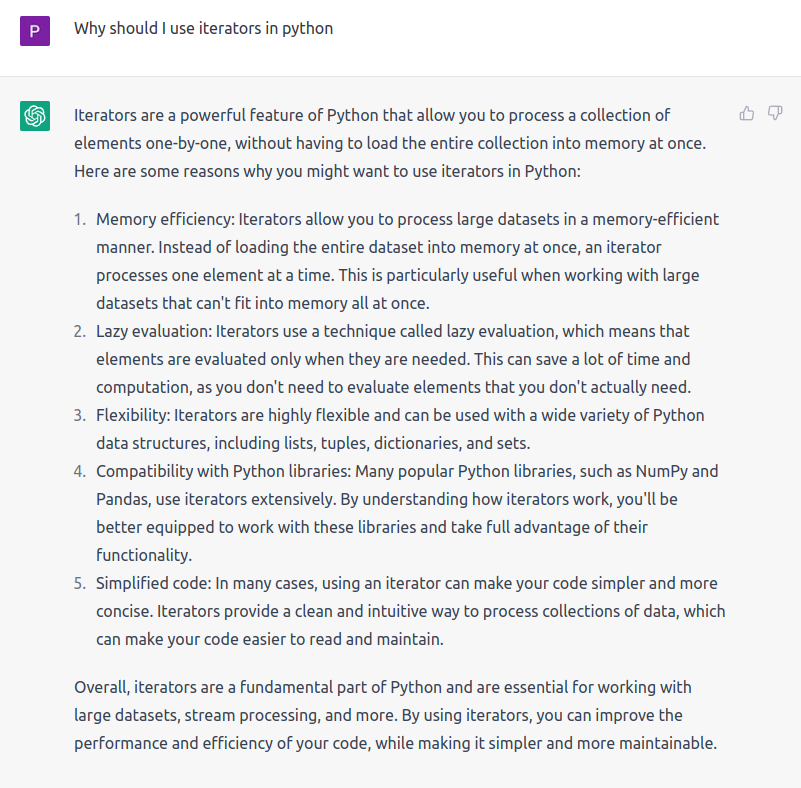

### С удобством создаём итерируемые объекты

Вернёмся к примеру, где мы создавали класс `Coordinates` и для этого нам пришлось писать ещё дополнительный класс итератора `CoordinatesIterator`, что очень сильно усложнило наш код. Здесь нам очень сильно могут помочь генераторы.

Что же нам нужно сделать. Метод `__iter__` в классе `Coordinates` требует, чтобы мы возвращали итератор, но мы не хотим писать для этого отдельный класс. И тут мы вспоминаем, что **генераторы это** на самом деле те же самые **итераторы**, которые проще создавать. Поэтому давайте сделаем так, чтобы метод `__iter__` в классе `Coordinates` возвращал **генератор**

Для контраста, вот код ДО:
```python
class CoordinatesIterator:
    def __init__(self, x, y, z):
        self.__x = x
        self.__y = y
        self.__z = z
        self.__current_iteration = 0
        
    def __iter__(self):
        return self
        
    def __next__(self):
        if self.__current_iteration == 0:
            result = self.__x
        elif self.__current_iteration == 1:
            result = self.__y
        elif self.__current_iteration == 2:
            result = self.__z
        else:
            raise StopIteration
        self.__current_iteration += 1
        return result


class Coordinates:
    def __init__(self, x=0, y=0, z=0):
        self.x = x
        self.y = y
        self.z = z
        
    def __iter__(self):
        return CoordinatesIterator(x=self.x, y=self.y, z=self.z)
```

а вот код ПОСЛЕ применения генератора

In [ ]:
class Coordinates:
    def __init__(self, x=0, y=0, z=0):
        self.x = x
        self.y = y
        self.z = z
        
    def __iter__(self):  # Coordinates().__iter__ это функция с yield внутри, а значит она возвращает генератор, а генератор это итератор, а значит мы выполнили требования `__iter__`
        yield self.x
        yield self.y
        yield self.z

In [ ]:
coordinates = Coordinates(-1, 2, -3)
for coord in coordinates:
    print(coord)

<generator object Coordinates.__iter__ at 0x7fbd11529890>

In [103]:
iter(coordinates)

<generator object Coordinates.__iter__ at 0x7fb9f8c43120>

Всё работает точно также, но занимает в разы меньше кода. Во многом именно поэтому создание итерируемых объектов при помощи превращения метода `__iter__` в генератор это state of the art для небольших и средних классов. Генераторы позволяют нам описать всю логику итератора в одном классе с объектом, который должен использовать этот итератор.

# Модуль itertools

**itertools** &mdash; это модуль стандартной библиотеки питона. В нём, как понятно из названия, находятся всяческие функции и классы как-то связанные с итерацией. В частности, там есть много полезных итераторов

## Комбинаторные итераторы

Это функции `product`, `permutations`, `combinations` и `combinations_with_replacement`. Они позволяют получать нам различные комбинации элементов. Поскольку число комбинаций (речь не о сочетаниях, а о любых комбинаторных наборах данных), как правило, экспоненциально увеличивается с увеличением количества комбинируемых элементов, данные функции представлены именно итераторами. То есть ваши комбинации будут вычисляться сразу по ходу итерации, а не загружаться сразу в память

Например, функция `combinations` генерирует нам сочетания

In [2]:
import itertools


for comb in itertools.combinations("ABCDEFG", 2):  # Генератор сочетаний длиной 2 без перестановок (это итератор, next с ним работает)
    print(comb)

('A', 'B')
('A', 'C')
('A', 'D')
('A', 'E')
('A', 'F')
('A', 'G')
('B', 'C')
('B', 'D')
('B', 'E')
('B', 'F')
('B', 'G')
('C', 'D')
('C', 'E')
('C', 'F')
('C', 'G')
('D', 'E')
('D', 'F')
('D', 'G')
('E', 'F')
('E', 'G')
('F', 'G')


Например, вы пишите программу для подбора паролей, которая перебирает все возможные пароли из 10 символов

In [5]:
import string
import itertools


alphabet = string.ascii_letters + string.digits + string.punctuation
print(alphabet)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


**Не запускайте этот код, он будет работать очень долго**

In [ ]:
# Возможных комбинаций просто огромное количество, они все просто не смогут поместиться в память, но так, мы получаем их по 1, не затрачивая память
for passw_chars in itertools.combinations_with_replacement(alphabet, 10):
    passw = "".join(passw_chars)

А вот, что было бы, если бы данная функция возвращала список, а не итератор. **Данный код уже можно запустить 😸**

In [ ]:
passwords = list(itertools.combinations_with_replacement(alphabet, 10))

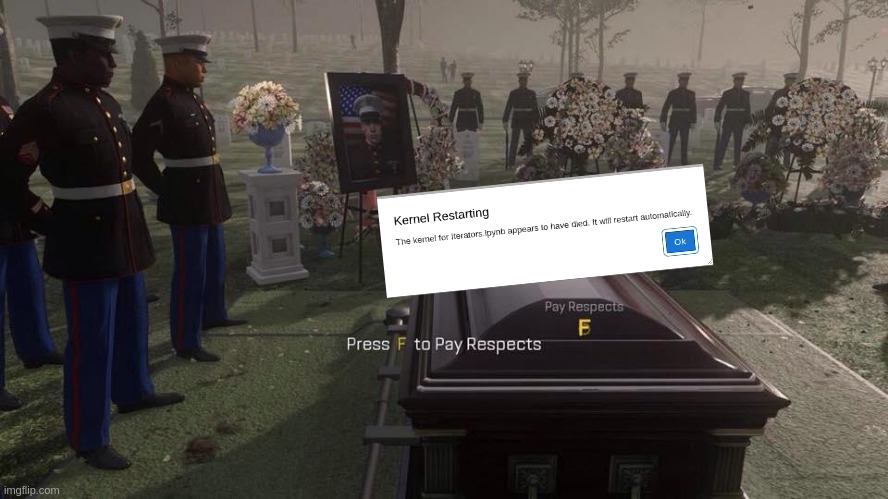

**Ни в коем случае не считайте кол-во комбинаций при помощи функций из itertools**

In [37]:
import itertools

len(list(itertools.combinations("ABCDEFGHIJKLMNOPQRSTUVWXYZ", 2)))   # Это не ваш бро, так как для подсчёта комбинаций нам нужно все их создать

325

In [39]:
import math

math.comb(26, 2)   # Это ваш бро, так как он считает число по формуле и не тратит память

325

## Аналоги map и filter

В `itertools` есть модифицированные аналоги функций `map` и `filter` - [filterfalse](https://docs.python.org/3/library/itertools.html#itertools.filterfalse) и [starmap](https://docs.python.org/3/library/itertools.html#itertools.starmap)

## `islice`

Данная функция позволяет сделать срез итератора, вернётся из неё, очевидно, также итератор. Местами очень полезная штука

## И ещё разные интересные функции для работы с итерируемыми объектами

[Ссылка на модуль itertools](https://docs.python.org/3/library/itertools.html#module-itertools), почитайте, если вам интересно

# Интересное и/или полезное

## Функция `zip`

Обязательно берите эту функцию себе на вооружение, она позволяет нам удобно итерироваться по нескольким объектам одновременно. Например, вот такой код

In [9]:
letters = "abcdefg"
digits = "0123456"
punctuation = ",./:'!@"

for idx in range(len(letters)):
    letter = letters[idx]
    digit = digits[idx]
    punct = punctuation[idx]
    print(letter, digit, punct)

a 0 ,
b 1 .
c 2 /
d 3 :
e 4 '
f 5 !
g 6 @


при помощи `zip` можно превратить вот в такой

In [10]:
letters = "abcdefg"
digits = "0123456"
punctuation = ",./:'!@"

for letter, digit, punct in zip(letters, digits, punctuation):
    print(letter, digit, punct)

a 0 ,
b 1 .
c 2 /
d 3 :
e 4 '
f 5 !
g 6 @


То есть нет нужды перебирать индексы, никто не любит перебирать индексы

Если ваши iterables, которые вы передаёте в `zip` имеют разную длину, то `zip` остановится в тот момент, когда закончатся элементы хотя бы в одном

In [11]:
letters = "a"
digits = "0123"
punctuation = ",./:'!@"

for letter, digit, punct in zip(letters, digits, punctuation):
    print(letter, digit, punct)

a 0 ,


В противовес такому поведению существует функция [itertools.zip_longest](https://docs.python.org/3/library/itertools.html#itertools.zip_longest)

При каждом вызове `next` нам возвращается `tuple`

In [12]:
iterator = zip(letters, digits, punctuation)
next(iterator)

('a', '0', ',')

Через `zip` можно создавать словари из двух iterables. Первый объект - ключи, второй - значения

In [15]:
dict(zip(range(0, 16), "0123456789ABCDEF"))

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F'}

`zip` крутой, пользуйтесь `zip`

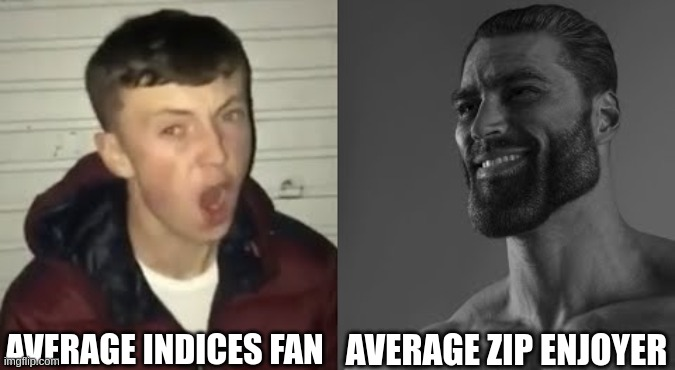

## Реализация итерируемых объектов через метод `__getitem__`

С данным методом мы уже знакомы. Он позволяет нам получать элементы из нашего объекта по индексу и делать срезы. Как же это может позволить нам сделать итерируемый объект?

Дело в том, что при наличии `__getitem__`, но при отсутствии `__iter__`, питон просто попробует производить итерацию по объекту, пытаясь получить сначала 0 элемент, затем 1, 2 и т.д.

In [8]:
class MyIterableClass:
    def __init__(self, container):
        self.container = container
        
    def __getitem__(self, idx):
        return self.container[idx]
    

my_iterable = MyIterableClass([5, 4, 3, 2, 1])
for i in my_iterable:
    print(i)

5
4
3
2
1


Работает, а если убрать `__getitem__`, то итерация не будет поддерживаться

In [7]:
class MyIterableClass:
    def __init__(self, container):
        self.container = container
    

my_iterable = MyIterableClass([5, 4, 3, 2, 1])
for i in my_iterable:
    print(i)

TypeError: 'MyIterableClass' object is not iterable

При этом, чтобы вся эта история корректно работала, нам необходимо сделать так, чтобы `__getitem__` ожидал **неотрицательные целые числа** (0, 1, ..., N), так как именно эти числа будет передавать ему питон для получения каждого следующего элемента при итерации. Например, если мы сделаем так, чтобы `__getitem__` производил индексацию, начиная с 1, то итерация по такому объекту даст нам не то, что мы ожидаем

In [9]:
class MyIterableClass:
    def __init__(self, container):
        self.container = container
        
    def __getitem__(self, idx):
        return self.container[idx - 1]
    
    
my_iterable = MyIterableClass([5, 4, 3, 2, 1])
for i in my_iterable:
    print(i)

1
5
4
3
2
1


Первой напечаталась единица из-за того, что питон для получения элемента на первой итерации цикла `for` выполнил код `my_iterable[0]`, что привело к вызову `self.container[-1]` внутри `__getitem__`

Поэтому `__getitem__` можно использовать только для создания итерируемых объектов, индексируемых **неотрицательными целыми числами**

Тем не менее, итерируемые объекты редко целенаправленно создают через `__getitem__`, это скорее полезный побочный эффект данного метода.

## Больше про генераторы

### `yield from`

Инструкция `yield from` позволяет генератору `yield'ить` элементы из какого-то ещё итератора

In [16]:
def generator1():
    for i in range(10):
        yield i
        

def generator2():
    yield 1
    yield 3
    yield 5
    yield 8   # До этого момента наш генератор выполняется как обычно, возвращая число при каждом вызове next
    yield from generator1()  # В этот момент мы как бы переключаемся на другой итератор, при этом значения в конце концов будут возвращаться из текущего
    yield 13  # А после исчерпания итератора на строке выше, мы продолжим yield'ить из текущего
    yield 21
    
    
list(generator2())

[1, 3, 5, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 21]

Альтернативно,

```python
yield from generator1()
```
можно было бы записать вот так
```python
for item in generator1():
    yield item
```
Два данных куска кода делают абсолютно одно и тоже, так что `yield from` это просто синтаксический сахар

### `.send`

Сразу скажу, это вам не нужно, но штука эта прикольная. Генераторы также поддерживают следующий синтаксис

In [35]:
def generator():
    for i in range(3):
        recieved_value = yield i
        print(recieved_value)
        

gen = generator()
print(next(gen))
print(gen.send("This message was sent to generator"))
print(next(gen))

0
This message was sent to generator
1
None
2


Запутались? Я тоже...

Метод `send` генератора позволяет нам отправлять значения к нему внутрь. Для этого требуется конструкция вида
```python
recieved_value = yield variable
```

В `recieved_value` попадёт то, что мы передаём в `send`

При этом вызов `send` заменяет собой вызов `next`, при вызове `generator.send(value)` также начинает исполняться код генератора до следующей инструкции `yield`. При этом есть несколько особенностей:
1. Мы не можем начать исполнение генератора с вызова `send`. Первым обязательно должен быть вызов `next` 

In [36]:
gen = generator()
print(gen.send("This message was sent to generator"))

TypeError: can't send non-None value to a just-started generator

2. То, что указано после `yield` **возвращается из `send`**
3. Если мы вызвали `next` вместо `send`, то получаемое значение по-умолчанию будет `None`

В приведённом примере порядок исполнения кода был следующий:
1. Первый вызов `next(gen)`. Исполнение дошло до кода `yield i` (но `recieved_value = ` не выполнялось)
2. Второй вызов `gen.send("This message was sent to generator")`. Исполнение начинается с записи переданного значения в `recieved_value` и продолжается до следующего `yield i`. `i` при этом возвращается из `send`
3. Третий вызов `next(gen)`. Здесь мы должны были бы записать значение в `recieved_value`, но поскольку был вызван `next`, а не `send`, то в `recieved_value` запишется `None`. Исполнение продолжится до следующего `yield i`

In [37]:
def generator():
    for i in range(3):
        recieved_value = yield i
        print(recieved_value)
        

gen = generator()
print(next(gen))
print(gen.send("This message was sent to generator"))
print(next(gen))

0
This message was sent to generator
1
None
2


То есть синтаксис `recieved_value = yield variable` это не стандартное питоновское присваивание, а совершенно отдельный синтаксис. Можно смотреть на это так, что `= yield` это отдельный специальный оператор

`send` широко применялся для реализации асинхронного программирования в питоне до того, как удобные средства для этого добавили в язык, так что сейчас этой штукой практически не пользуются. Но может быть вы сможете найти ей применение

## `return`

В генераторах помимо `yield`, `yield from` и `= yield` ещё можно писать `return`

`return` в генераторах приобретает совершенно нелогичный смысл

In [42]:
def generator():
    for i in range(3):
        yield i
    return "Returned string"
        

gen = generator()
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))

0
1
2


StopIteration: Returned string

Да, `return` просто бросает `StopIteration` с указанным текстом

## Генераторные выражения (generator expressions)

Создавать генераторы в питоне можно в одну строку, для этого есть синтаксис аналогичный *list comprehensions*, но только здесь используются круглые скобки ()

In [ ]:
generator = (item for item in range(10))

print(type(generator))  # Это генератор
print(next(generator))  # next работает
print(generator[0])     # Индексация не работает

<class 'generator'>
0


TypeError: 'generator' object is not subscriptable

Интересный факт! Когда вы пишете следующий код

In [9]:
sum(i for i in range(10))

45

Внутри `i for i in range(10)` это тоже генераторное выражение, а не список, как вы могли бы подумать

# Дополнительные материалы

+ [Документация itertools](https://docs.python.org/3/library/itertools.html)
+ [Отличные уроки с базой по итераторам](https://stepik.org/lesson/24464/step/1?unit=6769)    